In [50]:
import numpy as np
import pandas as pd

In [51]:
import warnings
warnings.filterwarnings('ignore')

In [52]:
from tensorflow.keras.datasets import mnist
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

In [53]:
#train data shape, test data shape
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

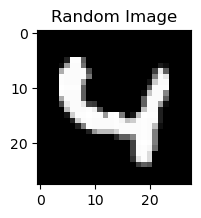

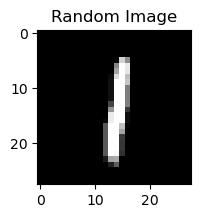

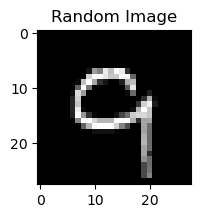

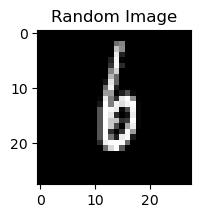

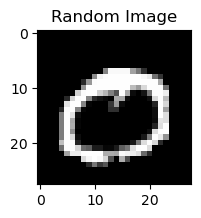

In [54]:
import cv2
import matplotlib.pyplot as plt

def imshow(title, image, size):
    h, w = image.shape[:2]
    aspect_ratio = w / h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) 
    plt.title(title)
    plt.show()
for i in range(5):
    rn_no = np.random.randint(0, len(x_train))
    img = x_train[rn_no]
    imshow('Random Image', img, size=2)

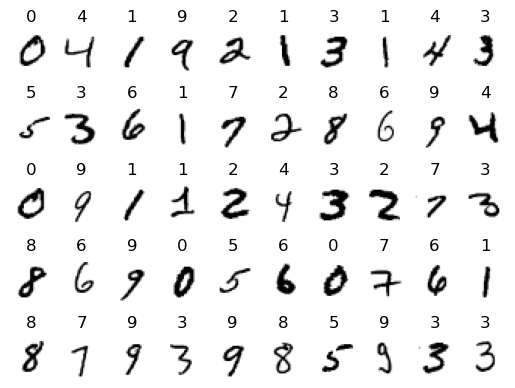

In [55]:
for i in range(1,51):
    plt.subplot(5,10,i).set_title(f'{y_train[i]}')
    plt.axis(False)
    plt.imshow(x_train[i],cmap = 'gray_r')

PREPROCESSING THE DATA

In [56]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]

x_train = x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test = x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows,img_cols,1)

In [57]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


x_train /= 255
x_test /= 255

In [58]:
y_train.shape,y_test.shape

((60000,), (10000,))

In [59]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
num_pixels = x_train.shape[0]*x_train.shape[1]

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu', input_shape = input_shape))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(num_classes,activation = 'softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = SGD(0.001),metrics = ['accuracy'])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               1179776   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

In [61]:
batch_size = 128
epochs = 25

history = model.fit(x_train,y_train,batch_size = batch_size,epochs = epochs,verbose = 1,validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 2.2372 - accuracy: 0.3142 - val_loss: 2.1308 - val_accuracy: 0.5191
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 1.8032 - accuracy: 0.6562 - val_loss: 1.2405 - val_accuracy: 0.7837
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.8197 - accuracy: 0.8212 - val_loss: 0.5458 - val_accuracy: 0.8622
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4843 - accuracy: 0.8706 - val_loss: 0.4048 - val_accuracy: 0.8879
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3959 - accuracy: 0.8882 - val_loss: 0.3518 - val_accuracy: 0.9035
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3555 - accuracy: 0.8982 - val_loss: 0.3223 - val_accuracy: 0.9079
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3297 - accuracy: 0.9043 - val_loss: 0.3011 - val_accuracy: 0.9128
Epoch 

In [62]:
history_dict = history.history
history_dict

{'loss': [2.237154483795166,
  1.8032492399215698,
  0.8197384476661682,
  0.4842979311943054,
  0.39587363600730896,
  0.3554709255695343,
  0.3297451138496399,
  0.3103495240211487,
  0.2946384847164154,
  0.2808431386947632,
  0.26834169030189514,
  0.25719594955444336,
  0.24733543395996094,
  0.2380833774805069,
  0.22971892356872559,
  0.22192004323005676,
  0.21453188359737396,
  0.20795072615146637,
  0.20139428973197937,
  0.19546912610530853,
  0.18995830416679382,
  0.18457742035388947,
  0.1796390414237976,
  0.17507213354110718,
  0.17062963545322418],
 'accuracy': [0.31423333287239075,
  0.6561999917030334,
  0.8212166428565979,
  0.8705999851226807,
  0.8881999850273132,
  0.8981999754905701,
  0.9043333530426025,
  0.9098333120346069,
  0.9143666625022888,
  0.918916642665863,
  0.9221166372299194,
  0.9251166582107544,
  0.928516685962677,
  0.9310833215713501,
  0.9336833357810974,
  0.9360666871070862,
  0.9383333325386047,
  0.9403333067893982,
  0.9418500065803528,

In [63]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [64]:
from tensorflow.keras.models import load_model

model = load_model('mnist_simple_cnn_10_Epochs.h5')

In [65]:
print(x_test.shape)

pred = np.argmax(model.predict(x_test), axis=-1)

print(pred)

(10000, 28, 28, 1)
313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [66]:
y_test = np.argmax(y_test, axis=-1)
result = np.absolute(y_test - pred)
misclassified_indices = np.nonzero(result > 0)
print(misclassified_indices)
print()
print(len(misclassified_indices[0]))

(array([   8,   33,   62,  124,  233,  241,  247,  259,  290,  320,  321,
        340,  341,  352,  358,  362,  381,  445,  448,  478,  479,  502,
        511,  531,  551,  565,  578,  582,  591,  610,  613,  619,  659,
        684,  689,  691,  707,  717,  720,  740,  791,  795,  810,  882,
        898,  950,  959,  965,  999, 1003, 1014, 1032, 1039, 1044, 1062,
       1101, 1107, 1112, 1114, 1131, 1181, 1182, 1192, 1194, 1198, 1204,
       1206, 1226, 1228, 1232, 1242, 1247, 1260, 1283, 1289, 1299, 1319,
       1326, 1328, 1337, 1378, 1393, 1441, 1444, 1467, 1494, 1500, 1522,
       1527, 1530, 1549, 1553, 1581, 1609, 1621, 1634, 1671, 1678, 1681,
       1709, 1717, 1754, 1774, 1790, 1800, 1850, 1857, 1868, 1878, 1883,
       1901, 1917, 1938, 1940, 1941, 1952, 1970, 1973, 1981, 1984, 2016,
       2024, 2035, 2043, 2044, 2053, 2070, 2098, 2109, 2118, 2129, 2130,
       2135, 2145, 2182, 2185, 2186, 2189, 2215, 2224, 2266, 2272, 2293,
       2299, 2325, 2369, 2371, 2387, 2393, 2395, 2

1/1 [==============================] - 0s 67ms/step


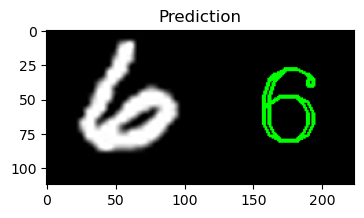

1/1 [==============================] - 0s 19ms/step


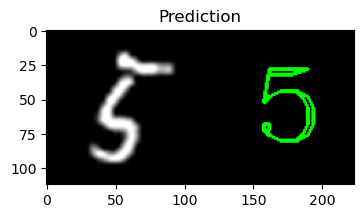

1/1 [==============================] - 0s 22ms/step


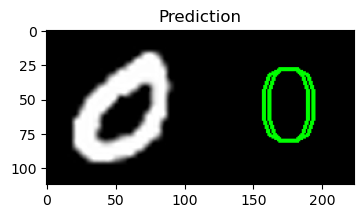

1/1 [==============================] - 0s 19ms/step


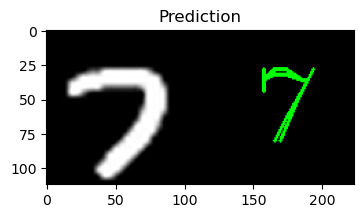

1/1 [==============================] - 0s 20ms/step


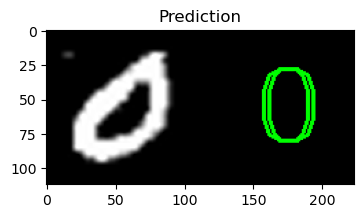

1/1 [==============================] - 0s 24ms/step


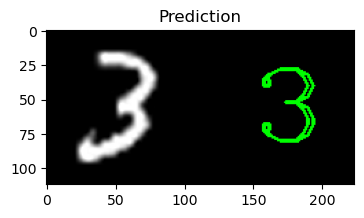

1/1 [==============================] - 0s 21ms/step


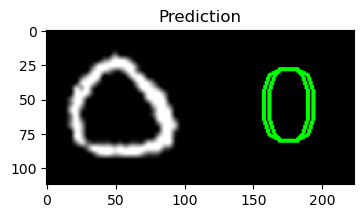

1/1 [==============================] - 0s 20ms/step


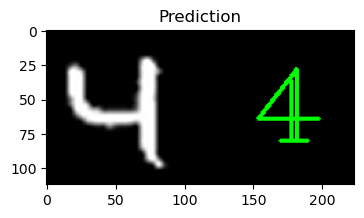

1/1 [==============================] - 0s 20ms/step


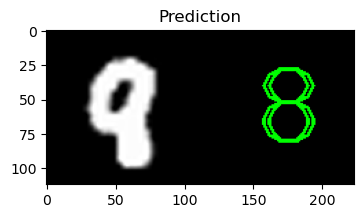

1/1 [==============================] - 0s 21ms/step


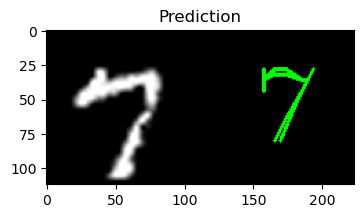

In [67]:
import cv2
(x_train, y_train), (x_test, y_test)  = mnist.load_data()

def draw_test(name, pred, input_im):  
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image,2)

for i in range(0,10):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    res = str(np.argmax(model.predict(input_im), axis=-1)[0])
    draw_test("Prediction", res,  np.uint8(imageL)) 

In [69]:
from sklearn.metrics import confusion_matrix
x_test = x_test.reshape(10000,28,28,1)

print(confusion_matrix(y_test, pred))

[[ 965    0    1    1    0    3    5    1    4    0]
 [   0 1115    3    2    1    1    4    2    7    0]
 [   8    0  985    9    3    2    3    7   13    2]
 [   3    2   10  971    0    2    1    7    8    6]
 [   2    0    8    1  939    0    5    3    5   19]
 [  10    1    0   24    2  823   11    2   11    8]
 [   8    3    4    1    9   10  918    1    4    0]
 [   1    8   20    5    6    1    0  967    4   16]
 [   6    1    4   15    7   10    7    5  913    6]
 [   9    6    1   15   26    2    1   13    4  932]]


In [70]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

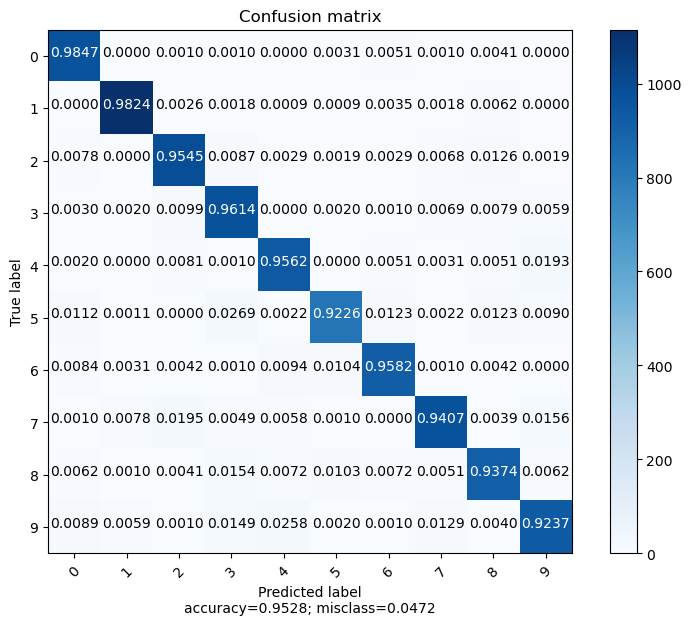

In [71]:
target_names = list(range(0,10))
conf_mat = confusion_matrix(y_test, pred)
plot_confusion_matrix(conf_mat, target_names)

In [72]:
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 98.469%
Accuracy for 1 : 98.238%
Accuracy for 2 : 95.446%
Accuracy for 3 : 96.139%
Accuracy for 4 : 95.621%
Accuracy for 5 : 92.265%
Accuracy for 6 : 95.825%
Accuracy for 7 : 94.066%
Accuracy for 8 : 93.737%
Accuracy for 9 : 92.369%


In [74]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.93      0.96      0.95      1010
           4       0.95      0.96      0.95       982
           5       0.96      0.92      0.94       892
           6       0.96      0.96      0.96       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.94      0.94       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

